# Clustering Consulting Project 

A large technology firm needs your help, they've been hacked! Luckily their forensic engineers have grabbed valuable data about the hacks, including information like session time,locations, wpm typing speed, etc. The forensic engineer relates to you what she has been able to figure out so far, she has been able to grab meta data of each session that the hackers used to connect to their servers. These are the features of the data:

* 'Session_Connection_Time': How long the session lasted in minutes
* 'Bytes Transferred': Number of MB transferred during session
* 'Kali_Trace_Used': Indicates if the hacker was using Kali Linux
* 'Servers_Corrupted': Number of server corrupted during the attack
* 'Pages_Corrupted': Number of pages illegally accessed
* 'Location': Location attack came from (Probably useless because the hackers used VPNs)
* 'WPM_Typing_Speed': Their estimated typing speed based on session logs.


The technology firm has 3 potential hackers that perpetrated the attack. Their certain of the first two hackers but they aren't very sure if the third hacker was involved or not. They have requested your help! Can you help figure out whether or not the third suspect had anything to do with the attacks, or was it just two hackers? It's probably not possible to know for sure, but maybe what you've just learned about Clustering can help!

**One last key fact, the forensic engineer knows that the hackers trade off attacks. Meaning they should each have roughly the same amount of attacks. For example if there were 100 total attacks, then in a 2 hacker situation each should have about 50 hacks, in a three hacker situation each would have about 33 hacks. The engineer believes this is the key element to solving this, but doesn't know how to distinguish this unlabeled data into groups of hackers.**

In [147]:
import findspark
findspark.init()
import SpectralClustering
import spark_eigen
import importlib
importlib.reload(SpectralClustering)
importlib.reload(spark_eigen)
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
import numpy as np

In [124]:
spark = SparkSession.builder.appName("raqui").getOrCreate()
df = spark.read.csv("hack_data.csv",header=True,inferSchema=True)
print(df.columns)

['Session_Connection_Time', 'Bytes Transferred', 'Kali_Trace_Used', 'Servers_Corrupted', 'Pages_Corrupted', 'Location', 'WPM_Typing_Speed']


In [125]:
ass = VectorAssembler(inputCols=['Session_Connection_Time','Kali_Trace_Used', 'Bytes Transferred', 'Servers_Corrupted', 
                                 'Pages_Corrupted', 'WPM_Typing_Speed'],outputCol="features")
feats = ass.transform(df)

In [126]:
scaler = MinMaxScaler(inputCol="features",outputCol="scaledFeatures")
scaled_feats = scaler.fit(feats).transform(feats)

In [138]:
arch = SpectralClustering.SpectralClustering(featuresCol="scaledFeatures",K=3,tol=0.005)
model = arch.fit(scaled_feats)
clust = model.transform(scaled_feats)
clust.show()

0.005944417868826096
0.005930369920351044
0.0059061946177801205
0.005880814813417897
0.00585375643168769
0.00583355287282903
0.005813954331504008
0.0057871159109064724
0.005759724979943633
0.005742170961677274
0.005730646355501181
0.005719871769354044
0.005694779942722526
0.005666544012486989
0.005643209537747297
0.005630387057940498
0.0056111263463911884
0.005582884702926468
0.005549603306307045
0.005529738704926253
0.005525752790109119
0.0055155616099481245
0.0054915950284599455
0.0054639382843180645
0.005450321264254345
0.005443257640964866
0.005425296048567972
0.005390000495280602
0.005359229351168627
0.0053438075421422485
0.0053357978660871636
0.00532254887993055
0.005294847759737149
0.005268930046549971
0.005263604043358008
0.0052698225001312285
0.005251302112592151
0.00521381035812037
0.0051842100372114204
0.005174202031642912
0.005169899513534015
0.005146400554183418
0.005111610059479125
0.005090278009092294
0.005088758697373236
0.005096258653607813
0.005081625616340978
0.00504

In [139]:
arch = KMeans(featuresCol="scaledFeatures",k=3)
model = arch.fit(scaled_feats)
km = model.transform(scaled_feats)

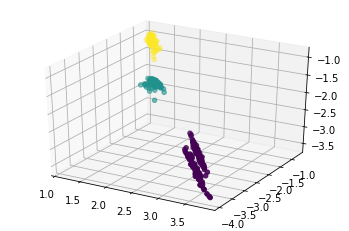

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

proj = clust.select(clust.columns).toPandas().to_numpy()
#print(proj)
proj = np.array([vec[0] for vec in proj])
pd.DataFrame(proj).to_csv("proj_hack.csv")

labs = km.select("prediction").collect()
#cl_idx = {0:"r",1:"b",2:"g"}
clrs = [L["prediction"] for L in labs]

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(proj[:,0],proj[:,1],proj[:,2], c=clrs, marker="o")
plt.show()

In [144]:
spark = SparkSession.builder.appName("iris").getOrCreate()
df = spark.read.csv("iris.csv",header=False,inferSchema=True)
df.show()

+---+---+---+---+-----------+
|_c0|_c1|_c2|_c3|        _c4|
+---+---+---+---+-----------+
|5.1|3.5|1.4|0.2|Iris-setosa|
|4.9|3.0|1.4|0.2|Iris-setosa|
|4.7|3.2|1.3|0.2|Iris-setosa|
|4.6|3.1|1.5|0.2|Iris-setosa|
|5.0|3.6|1.4|0.2|Iris-setosa|
|5.4|3.9|1.7|0.4|Iris-setosa|
|4.6|3.4|1.4|0.3|Iris-setosa|
|5.0|3.4|1.5|0.2|Iris-setosa|
|4.4|2.9|1.4|0.2|Iris-setosa|
|4.9|3.1|1.5|0.1|Iris-setosa|
|5.4|3.7|1.5|0.2|Iris-setosa|
|4.8|3.4|1.6|0.2|Iris-setosa|
|4.8|3.0|1.4|0.1|Iris-setosa|
|4.3|3.0|1.1|0.1|Iris-setosa|
|5.8|4.0|1.2|0.2|Iris-setosa|
|5.7|4.4|1.5|0.4|Iris-setosa|
|5.4|3.9|1.3|0.4|Iris-setosa|
|5.1|3.5|1.4|0.3|Iris-setosa|
|5.7|3.8|1.7|0.3|Iris-setosa|
|5.1|3.8|1.5|0.3|Iris-setosa|
+---+---+---+---+-----------+
only showing top 20 rows



In [148]:
ass = VectorAssembler(inputCols=['_c0','_c1','_c2','_c3'],outputCol="features")
feats = ass.transform(df)
feats.show()

+---+---+---+---+-----------+-----------------+
|_c0|_c1|_c2|_c3|        _c4|         features|
+---+---+---+---+-----------+-----------------+
|5.1|3.5|1.4|0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|4.9|3.0|1.4|0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|4.7|3.2|1.3|0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|4.6|3.1|1.5|0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|5.0|3.6|1.4|0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|5.4|3.9|1.7|0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|4.6|3.4|1.4|0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|5.0|3.4|1.5|0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|4.4|2.9|1.4|0.2|Iris-setosa|[4.4,2.9,1.4,0.2]|
|4.9|3.1|1.5|0.1|Iris-setosa|[4.9,3.1,1.5,0.1]|
|5.4|3.7|1.5|0.2|Iris-setosa|[5.4,3.7,1.5,0.2]|
|4.8|3.4|1.6|0.2|Iris-setosa|[4.8,3.4,1.6,0.2]|
|4.8|3.0|1.4|0.1|Iris-setosa|[4.8,3.0,1.4,0.1]|
|4.3|3.0|1.1|0.1|Iris-setosa|[4.3,3.0,1.1,0.1]|
|5.8|4.0|1.2|0.2|Iris-setosa|[5.8,4.0,1.2,0.2]|
|5.7|4.4|1.5|0.4|Iris-setosa|[5.7,4.4,1.5,0.4]|
|5.4|3.9|1.3|0.4|Iris-setosa|[5.4,3.9,1.3,0.4]|
|5.1|3.5|1.4|0.3|Iris-setosa|[5.1,3.5,1.

In [149]:
arch2 = SpectralClustering.SpectralClustering(featuresCol="features",K=3,tol=0.005)
model2 = arch2.fit(feats)
clust2 = model2.transform(feats)
clust2.show()

0.013196867393024624
0.01312001568506119
0.01299068830078796
0.012860824877922394
0.012735349593585481
0.012632082509379557
0.012520518767300792
0.012389443888520332
0.012269508753622312
0.012205790423544664
0.012157525948242966
0.012052204436776053
0.011951665603279708
0.011840759436080501
0.011753809303528382
0.011668263734696739
0.011541457217032909
0.011427836275526558
0.011340118957960409
0.011280937246581798
0.011215643920903174
0.01115912721452006
0.01108214652169064
0.011019264756131644
0.010937560975702008
0.01080281240031099
0.010699177090385072
0.010606860506739715
0.01053110246762009
0.010494797154493911
0.01037920422402616
0.010333178668142304
0.010294720227798744
0.010267658912254967
0.010182312237196086
0.010081579831977931
0.01000228371480322
0.009929644982159461
0.00986479083078014
0.009751427688523962
0.009685549789894462
0.009671681722648843
0.009622173704715489
0.00956923045828672
0.009547863871155316
0.00949098052070866
0.009406339707350256
0.00933388178823081
0.00

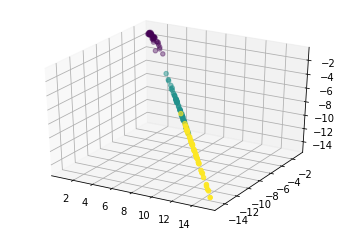

In [150]:
import csv
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import DoubleType

proj = clust2.select(clust.columns).toPandas().to_numpy()
#print(proj)
proj = np.array([vec[0] for vec in proj])
pd.DataFrame(proj).to_csv("proj.csv")
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
indexer = StringIndexer(inputCols=["_c4"],outputCols=["labels"])
labs = indexer.fit(df).transform(df)
labsarr = [int(x[0]) for x in labs.select("labels").toPandas().to_numpy()]


ax.scatter(proj[:,0],proj[:,1],proj[:,2], c=labsarr, marker="o")
plt.show()